<a href="https://colab.research.google.com/github/UnplugCharger/week-14/blob/master/WEEK_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

## Principal Component Analysis

In [1]:
sales <- read.csv('/content/Supermarket_Dataset_1 - Sales Data.csv')

In [2]:
#previewing the dataset 

head(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [3]:
dim(sales)

[1] 1000   16

Our dataset has 1000 rows and  16 columns 

this is a pretty wide dataset . That is why we need to do a dimentionality reduction to it 

In [4]:
str(sales)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

We have 8 numerical columns and 8 catergorical columns in our dataset

In [5]:
# checking if there are any missing values 
sum(is.na(sales))

[1] 0

We have a very clean dataset with no missing values 

In [6]:
# checking for duplicates
duplicated_rows <- sales[duplicated(sales),]
duplicated_rows

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


We have no duplicates in our dataset

In [11]:
# creating a dataset for PCA
pca_df <- sales[,c(6,7,8,12,13,14,15,16)]
head(pca_df)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


In [12]:

# Ensuring our variances is not 0
# Ensuring our variances is not 0
pca_df <- pca_df[ , which(apply(pca_df, 2, var) != 0)]
head(pca_df)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [13]:
myPr <- prcomp(pca_df,scale=TRUE)
myPr

Standard deviations (1, .., p=7):
[1] 2.218512e+00 1.000200e+00 9.938793e-01 3.000112e-01 3.131600e-16
[6] 1.457168e-16 3.219253e-17

Rotation (n x k) = (7 x 7):
                     PC1          PC2          PC3         PC4           PC5
Unit.price   -0.29176275  0.270866890 -0.693584569 -0.60037161  2.547868e-16
Quantity     -0.32452880 -0.212748396  0.633152868 -0.66972877 -2.299601e-17
Tax          -0.44977957  0.004196356  0.001836202  0.21835146 -2.606262e-01
cogs         -0.44977957  0.004196356  0.001836202  0.21835146 -3.390514e-01
gross.income -0.44977957  0.004196356  0.001836202  0.21835146 -2.646572e-01
Rating        0.01867926  0.938775165  0.343575909  0.01754621  1.107804e-17
Total        -0.44977957  0.004196356  0.001836202  0.21835146  8.643348e-01
                       PC6           PC7
Unit.price   -1.811615e-16 -1.661260e-16
Quantity     -2.058526e-16 -1.681903e-16
Tax          -4.896796e-01 -6.650473e-01
cogs          7.933264e-01 -7.534812e-02
gross.income -3.5

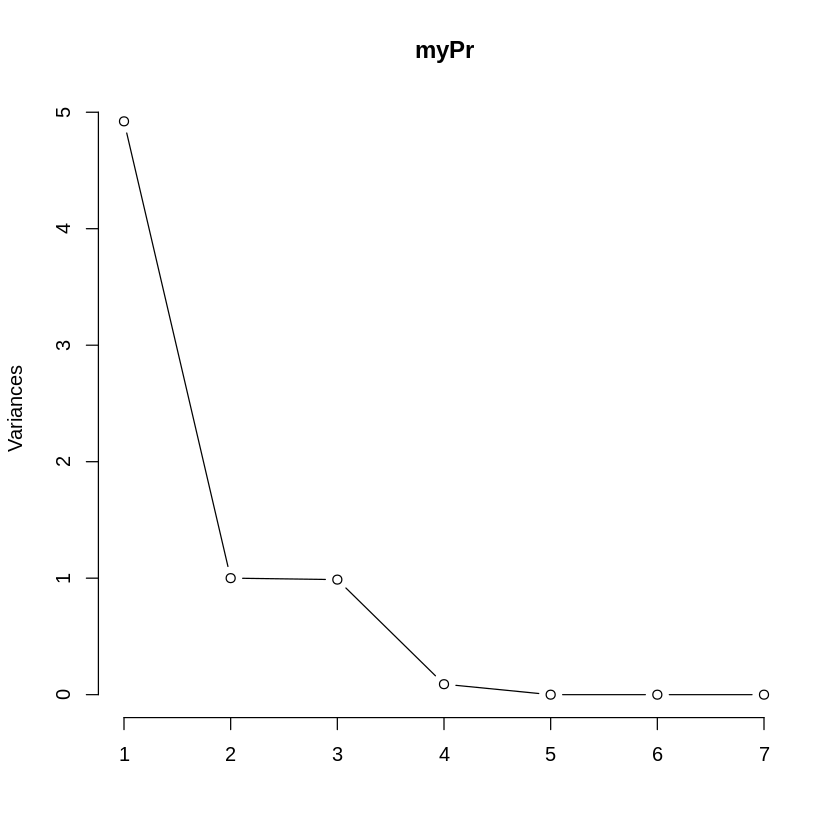

In [14]:
plot(myPr,type = 'l')

Most of the variability in our data are in the first second and third component of our PCa

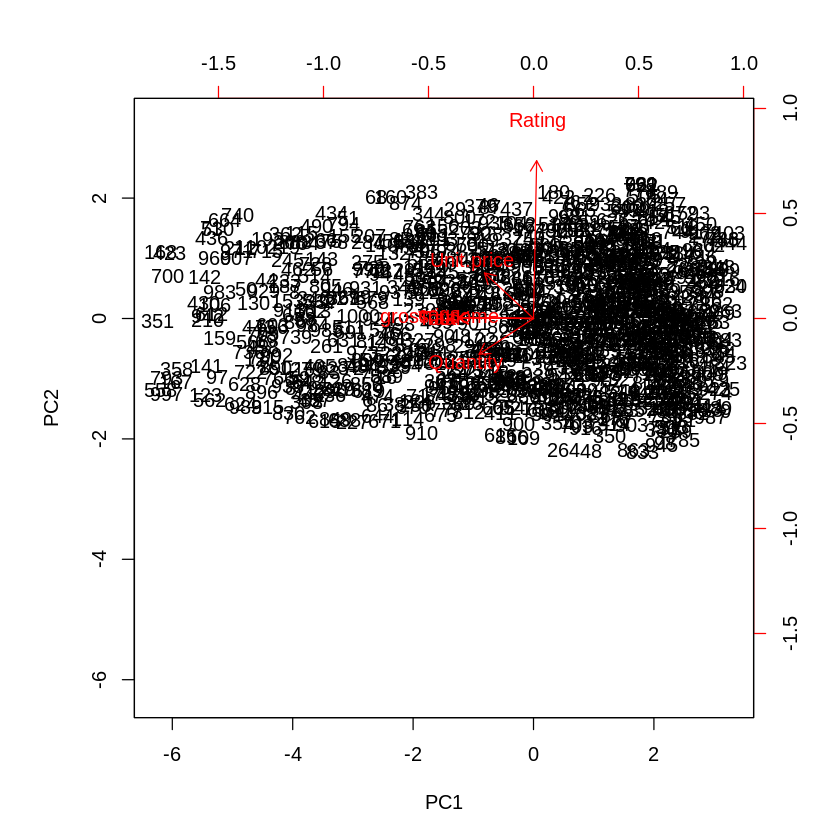

In [15]:
biplot(myPr,scale = 0)

The above doest really helpus group our data points so we will try and plot them using ggplots

In [22]:
# Then Loading our ggbiplot library
#  
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [31]:
pca_df2 <- cbind(sales,myPr$x[,1:3])

In [32]:
head(pca_df2)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,PC1,PC2,PC3
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,-2.0053643,1.26346268,0.2568841
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200,2.3061287,1.04275950,1.4649372
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255,-0.1863586,0.03066994,0.6532131
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,-1.5041579,0.63584271,0.7628867
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,-2.7995421,-0.68766184,-0.8044468
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,-2.7529768,-1.35302951,-1.0204669


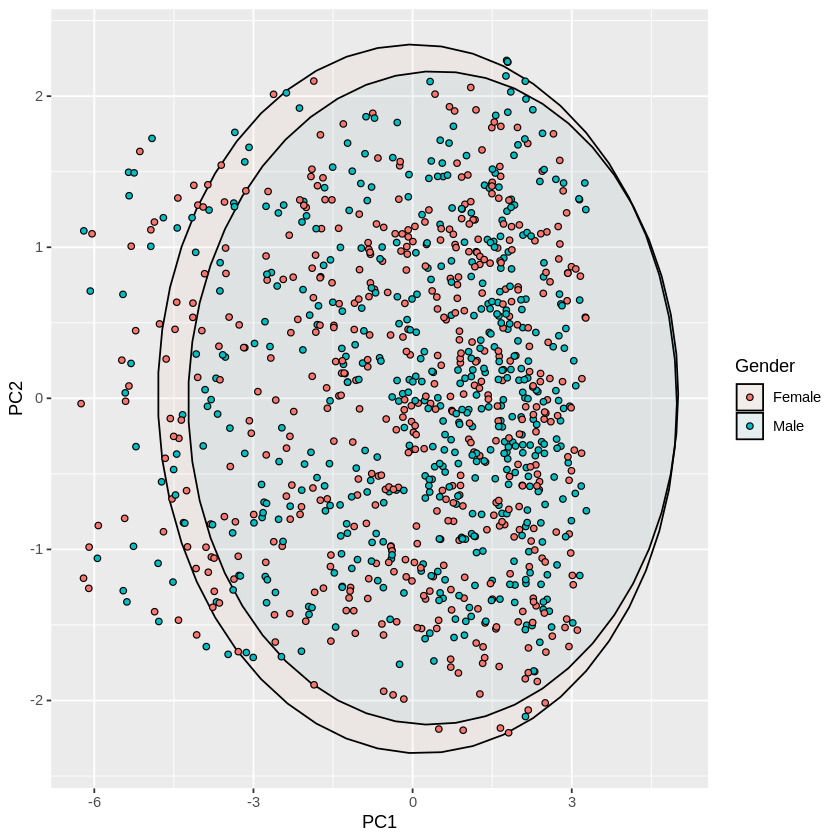

In [47]:
ggplot(pca_df2,aes(PC1,PC2,PC3,col=Product.line,fill=Gender))+
 stat_ellipse(geom = 'polygon',col='black',alpha=0.05)+
 geom_point(col='black',shape=21)

Our customers overlap in so many area hence using principal component analysis to group them into different catergories has failed

# Feature Selection in Unsupervised Learning

# Association Analysis

# Anomaly Detection